In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from google.colab import files
#Please comment out this line of code if unnecessary
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving bank-full.csv to bank-full.csv


In [2]:
Data = pd.read_csv("bank-full.csv")
Data.head(10) #several missing values!

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Univariate analysis:
a.) Univariate analysis-data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
b.) Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
c.) Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

In [3]:
Data.shape

(45211, 17)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


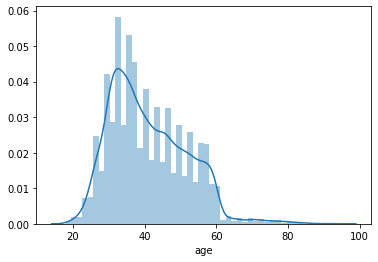

In [5]:
sns.distplot(Data['age'])

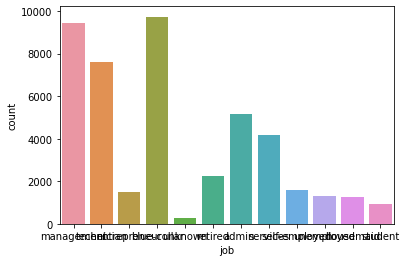

In [6]:
sns.countplot(Data['job'])

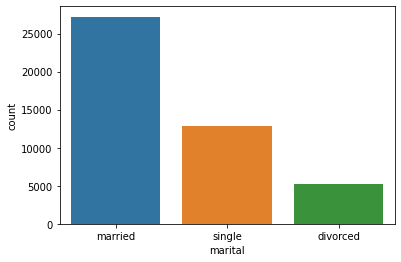

In [7]:
sns.countplot(Data['marital'])

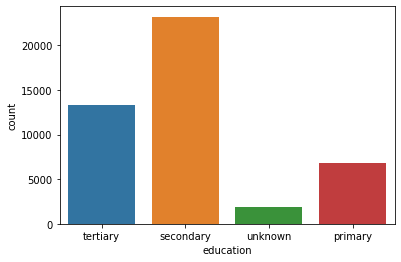

In [8]:
sns.countplot(Data['education'])

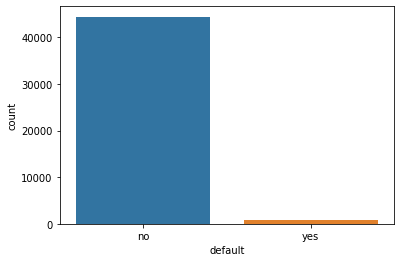

In [9]:
sns.countplot(Data['default'])

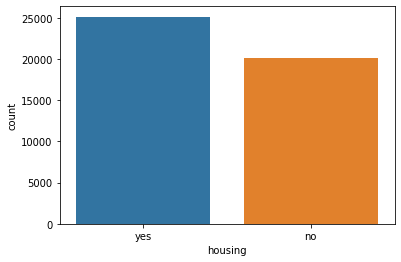

In [10]:
sns.countplot(Data['housing'])

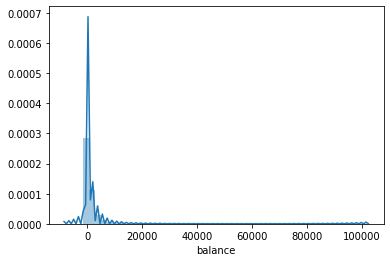

In [11]:
sns.distplot(Data['balance'])

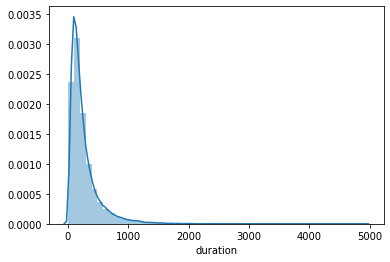

In [12]:
sns.distplot(Data['duration'])

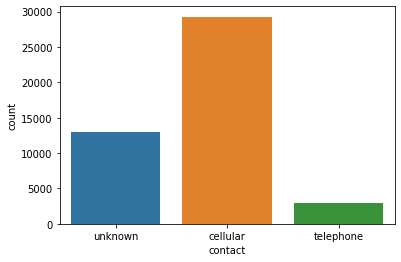

In [13]:
sns.countplot(Data['contact'])

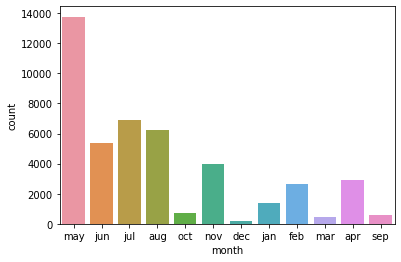

In [14]:
sns.countplot(Data.month)

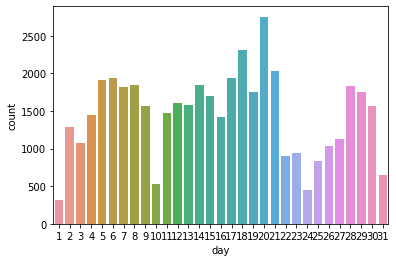

In [15]:
sns.countplot(Data.day)

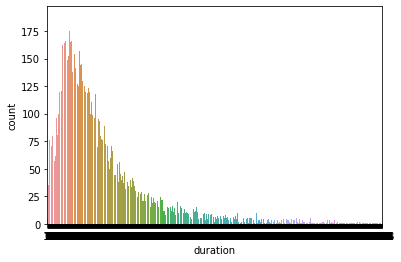

In [16]:
sns.countplot(Data.duration)

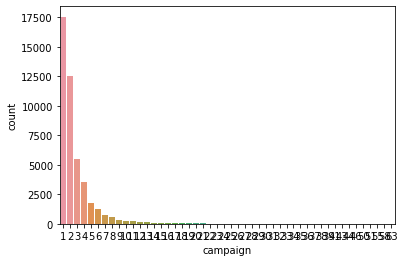

In [17]:
sns.countplot(Data.campaign)

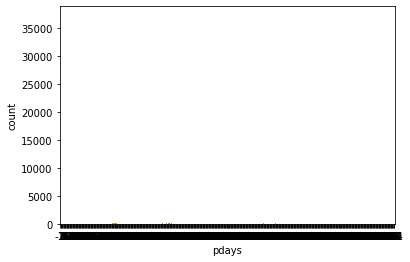

In [18]:
sns.countplot(Data.pdays)

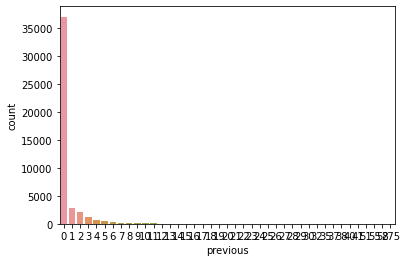

In [19]:
sns.countplot(Data.previous)

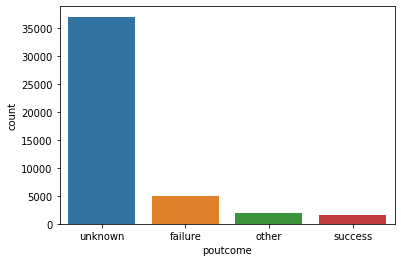

In [20]:
sns.countplot(Data.poutcome)

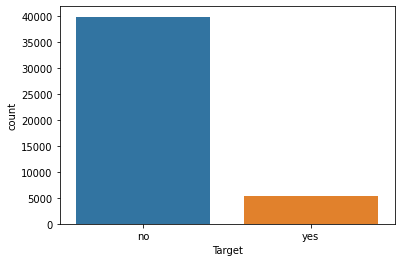

In [21]:
sns.countplot(Data.Target)